In [1]:
from pathlib import Path
desktop_path = Path.home() / "Desktop"
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, rf'{desktop_path}\RA\penicilin\Libaries')

In [2]:
from reload_lib import reload_lib
import main as m

import sensitivity as st
import sensitvity_countries as stc
import monte_carlo_energy as mce

import results_figures as rfig
import mid_to_endpoint_contribution as mte
import penicillin_cf_sensitivity as pcs

In [3]:
reload_lib(m)
init = m.main()

In [6]:
import brightway2 as bw
list(bw.methods)

[('CML v4.8 2016 no LT',
  'acidification no LT',
  'acidification (incl. fate, average Europe total, A&B) no LT'),
 ('CML v4.8 2016 no LT',
  'climate change no LT',
  'global warming potential (GWP100) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: freshwater no LT',
  'freshwater aquatic ecotoxicity (FAETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: marine no LT',
  'marine aquatic ecotoxicity (MAETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: terrestrial no LT',
  'terrestrial ecotoxicity (TETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'energy resources: non-renewable no LT',
  'abiotic depletion potential (ADP): fossil fuels no LT'),
 ('CML v4.8 2016 no LT',
  'eutrophication no LT',
  'eutrophication (fate not incl.) no LT'),
 ('CML v4.8 2016 no LT',
  'human toxicity no LT',
  'human toxicity (HTP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'material resources: metals/minerals no LT',
  'abiotic depletion potential (ADP): elements (ultimate reserves) no LT')

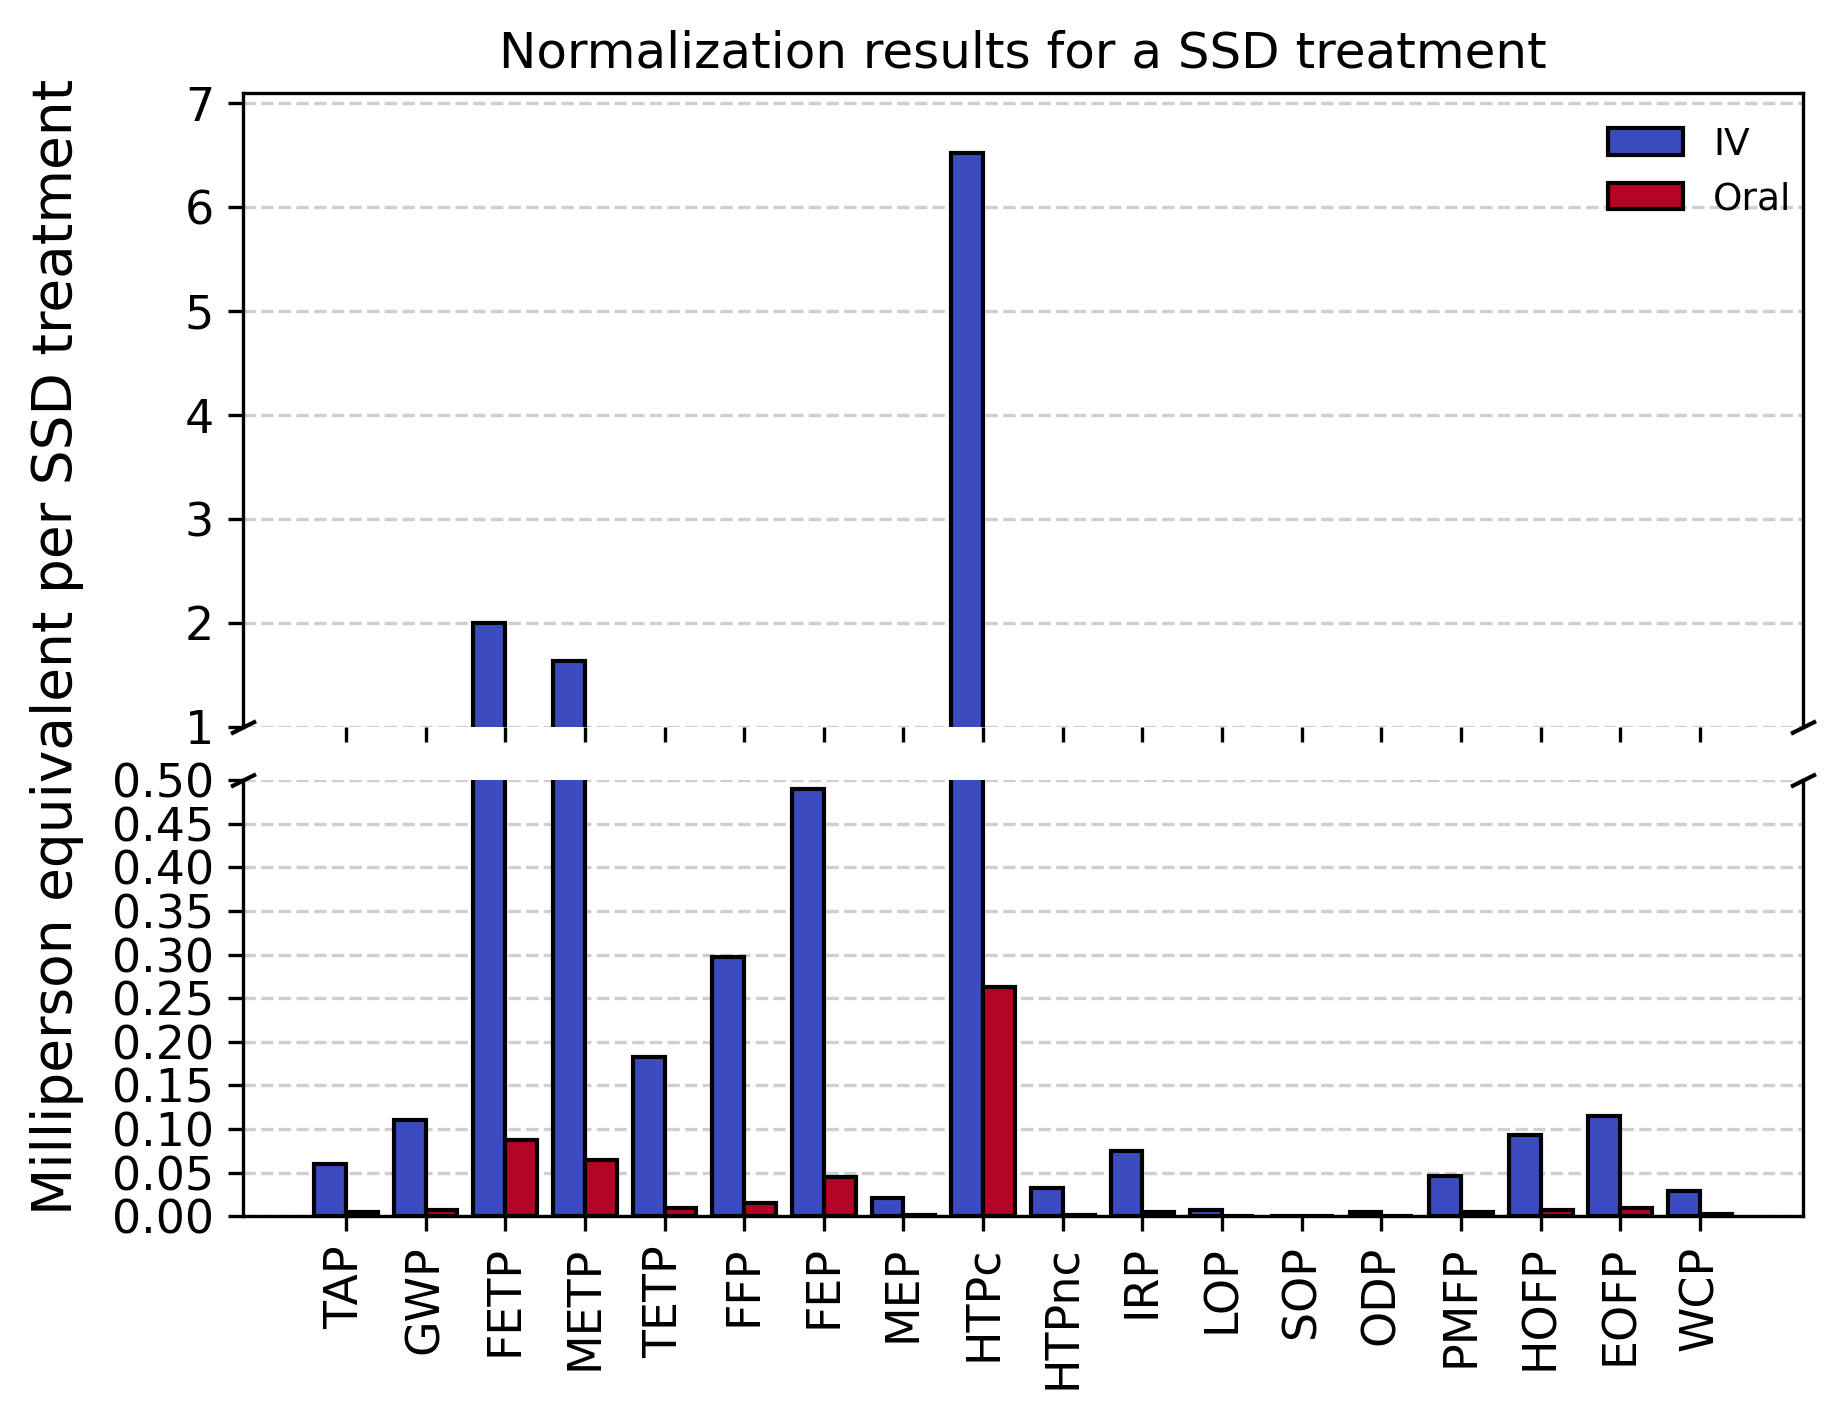

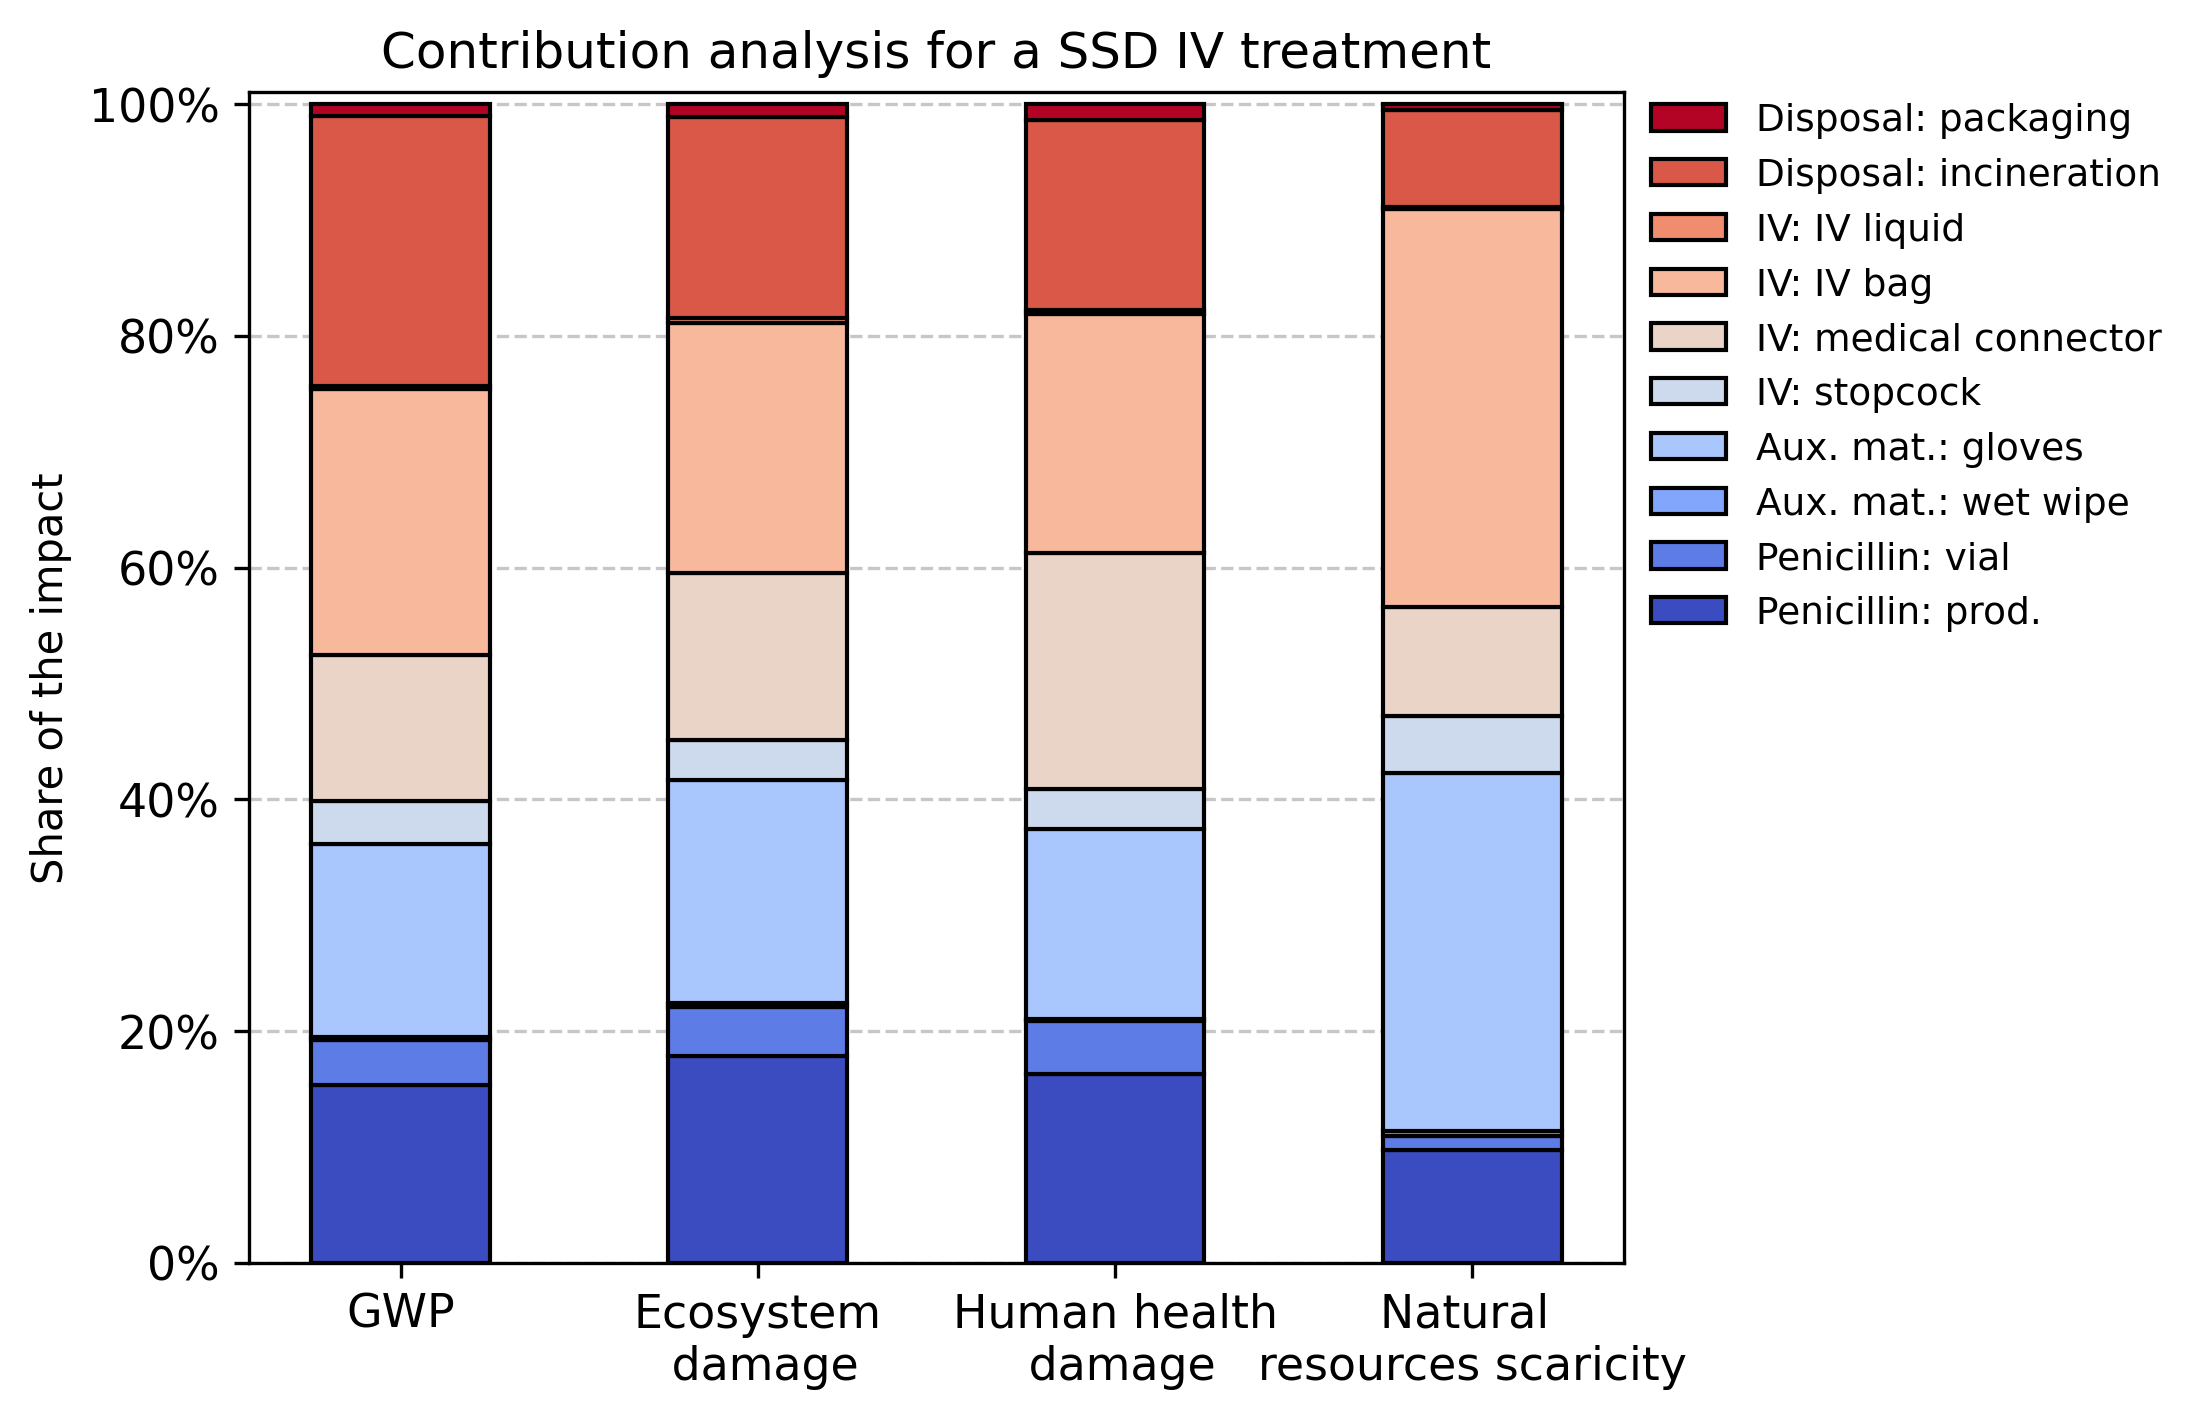

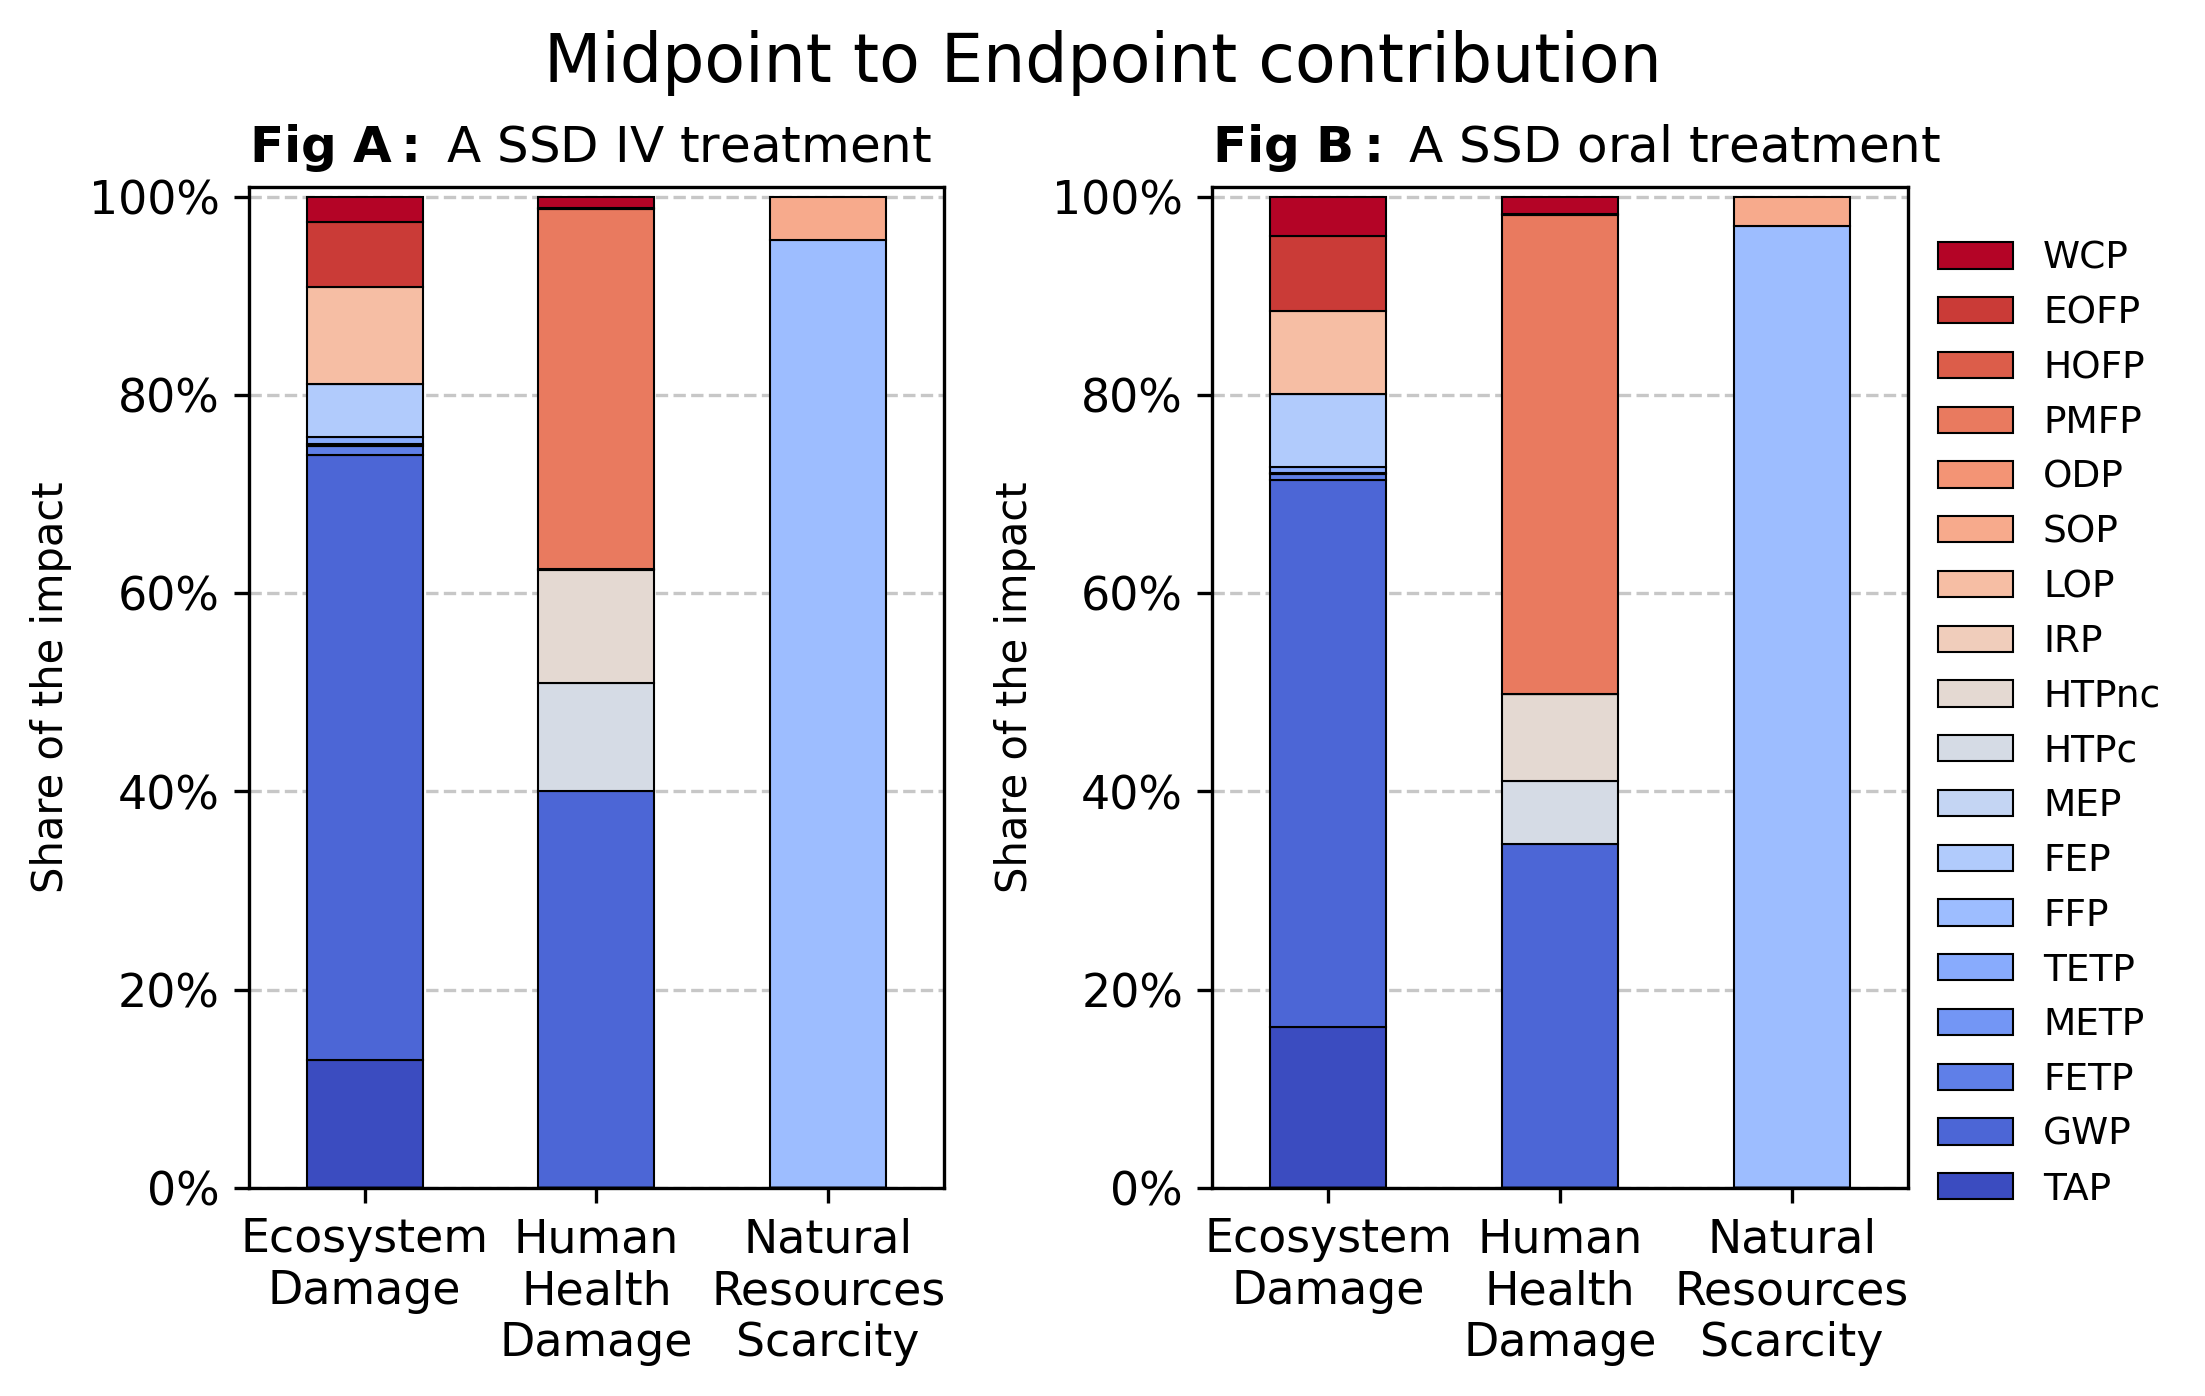

Min reduction : 89.52%
Max reduction : 62.05%


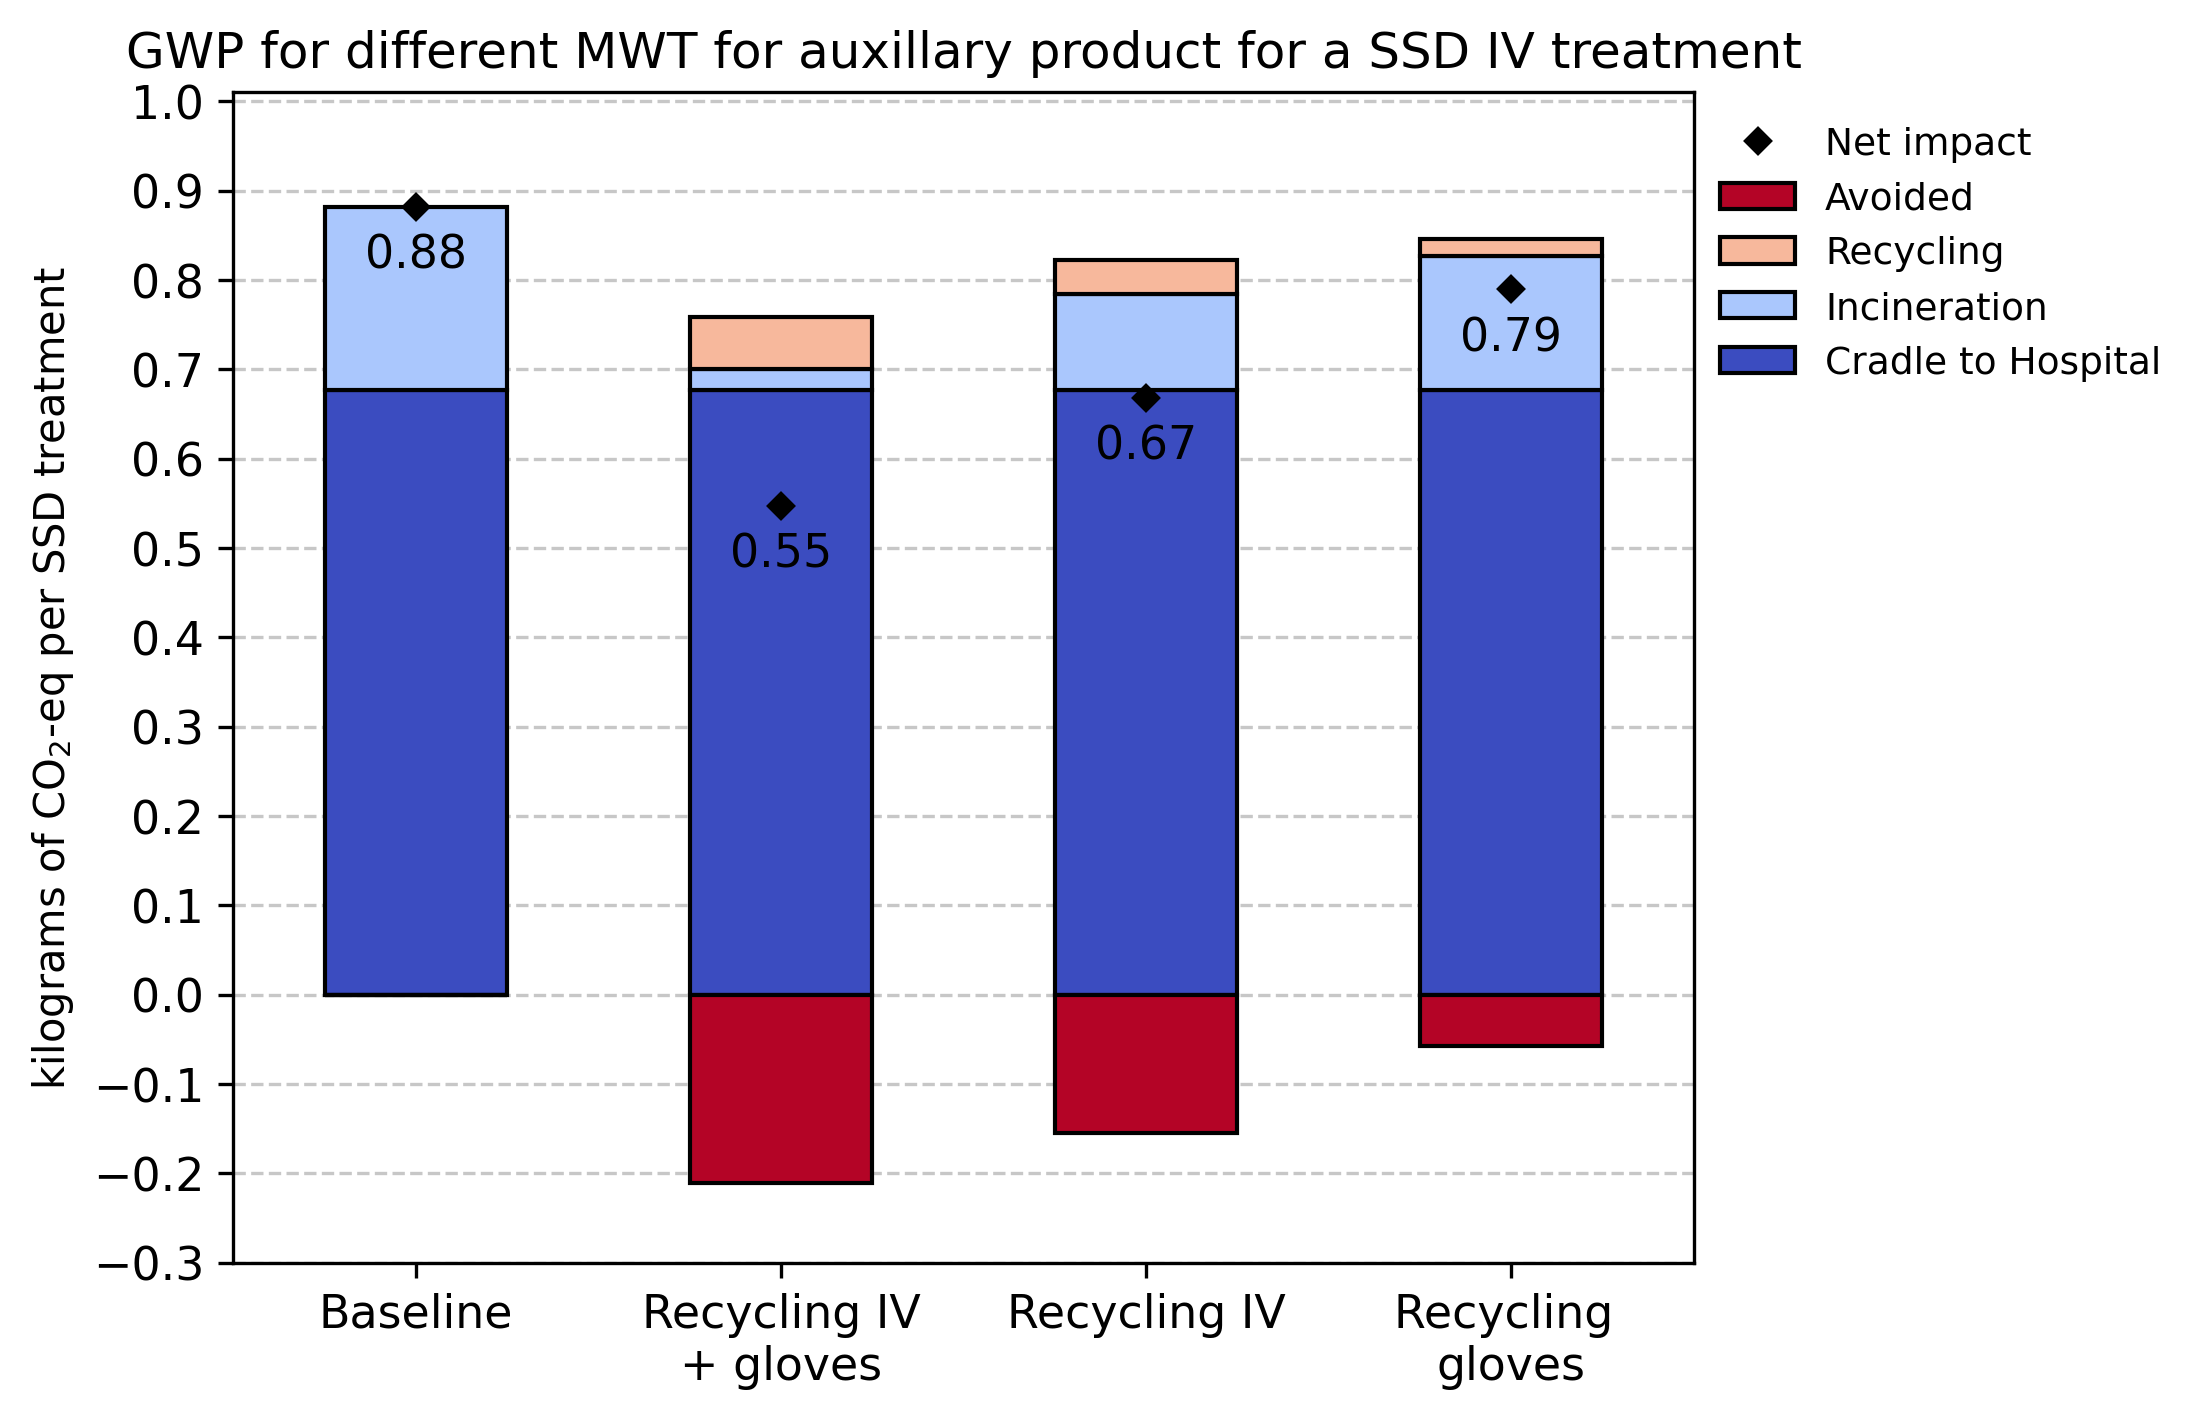

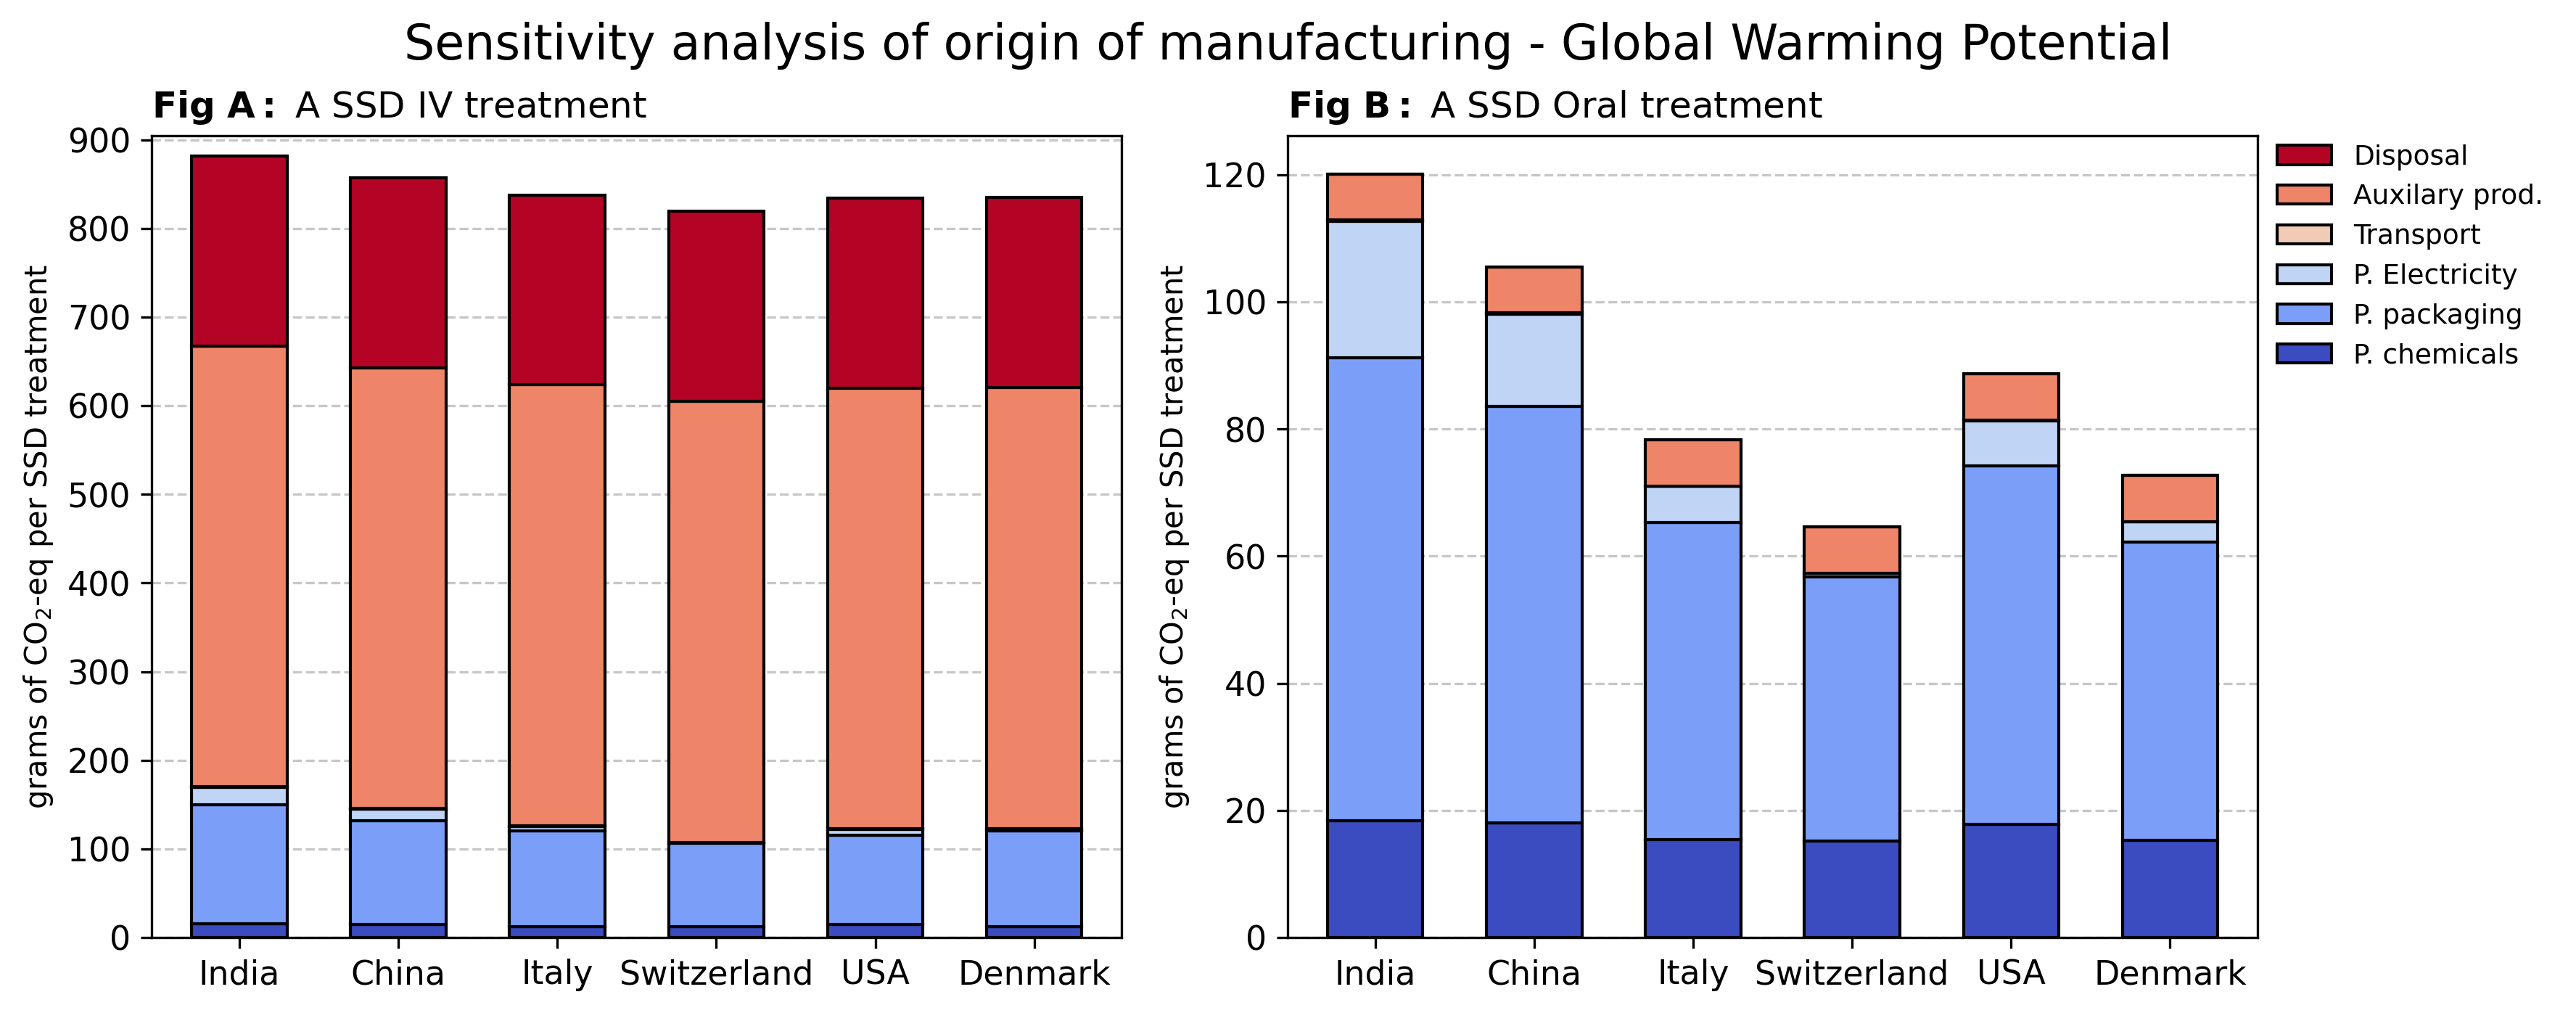

Extracted 1 worksheets in 0.04 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 3.49 seconds
Matching database: ev391cutoff
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


33 datasets
275 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\ruw\AppData\Local\pylca\Brightway3\Penicillin.7179b081106185b3e43fbe3ebfd7f229\output\db-matching-penicillin_cut_off_IN-unlinked.xlsx


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 10/22/2025 10:41:22
  Finished: 10/22/2025 10:41:22
  Total time elapsed: 00:00:00
  CPU %: 66.50
  Memory %: 2.21
Created database: penicillin_cut_off_IN
30.85834725129892
32.35125174301644


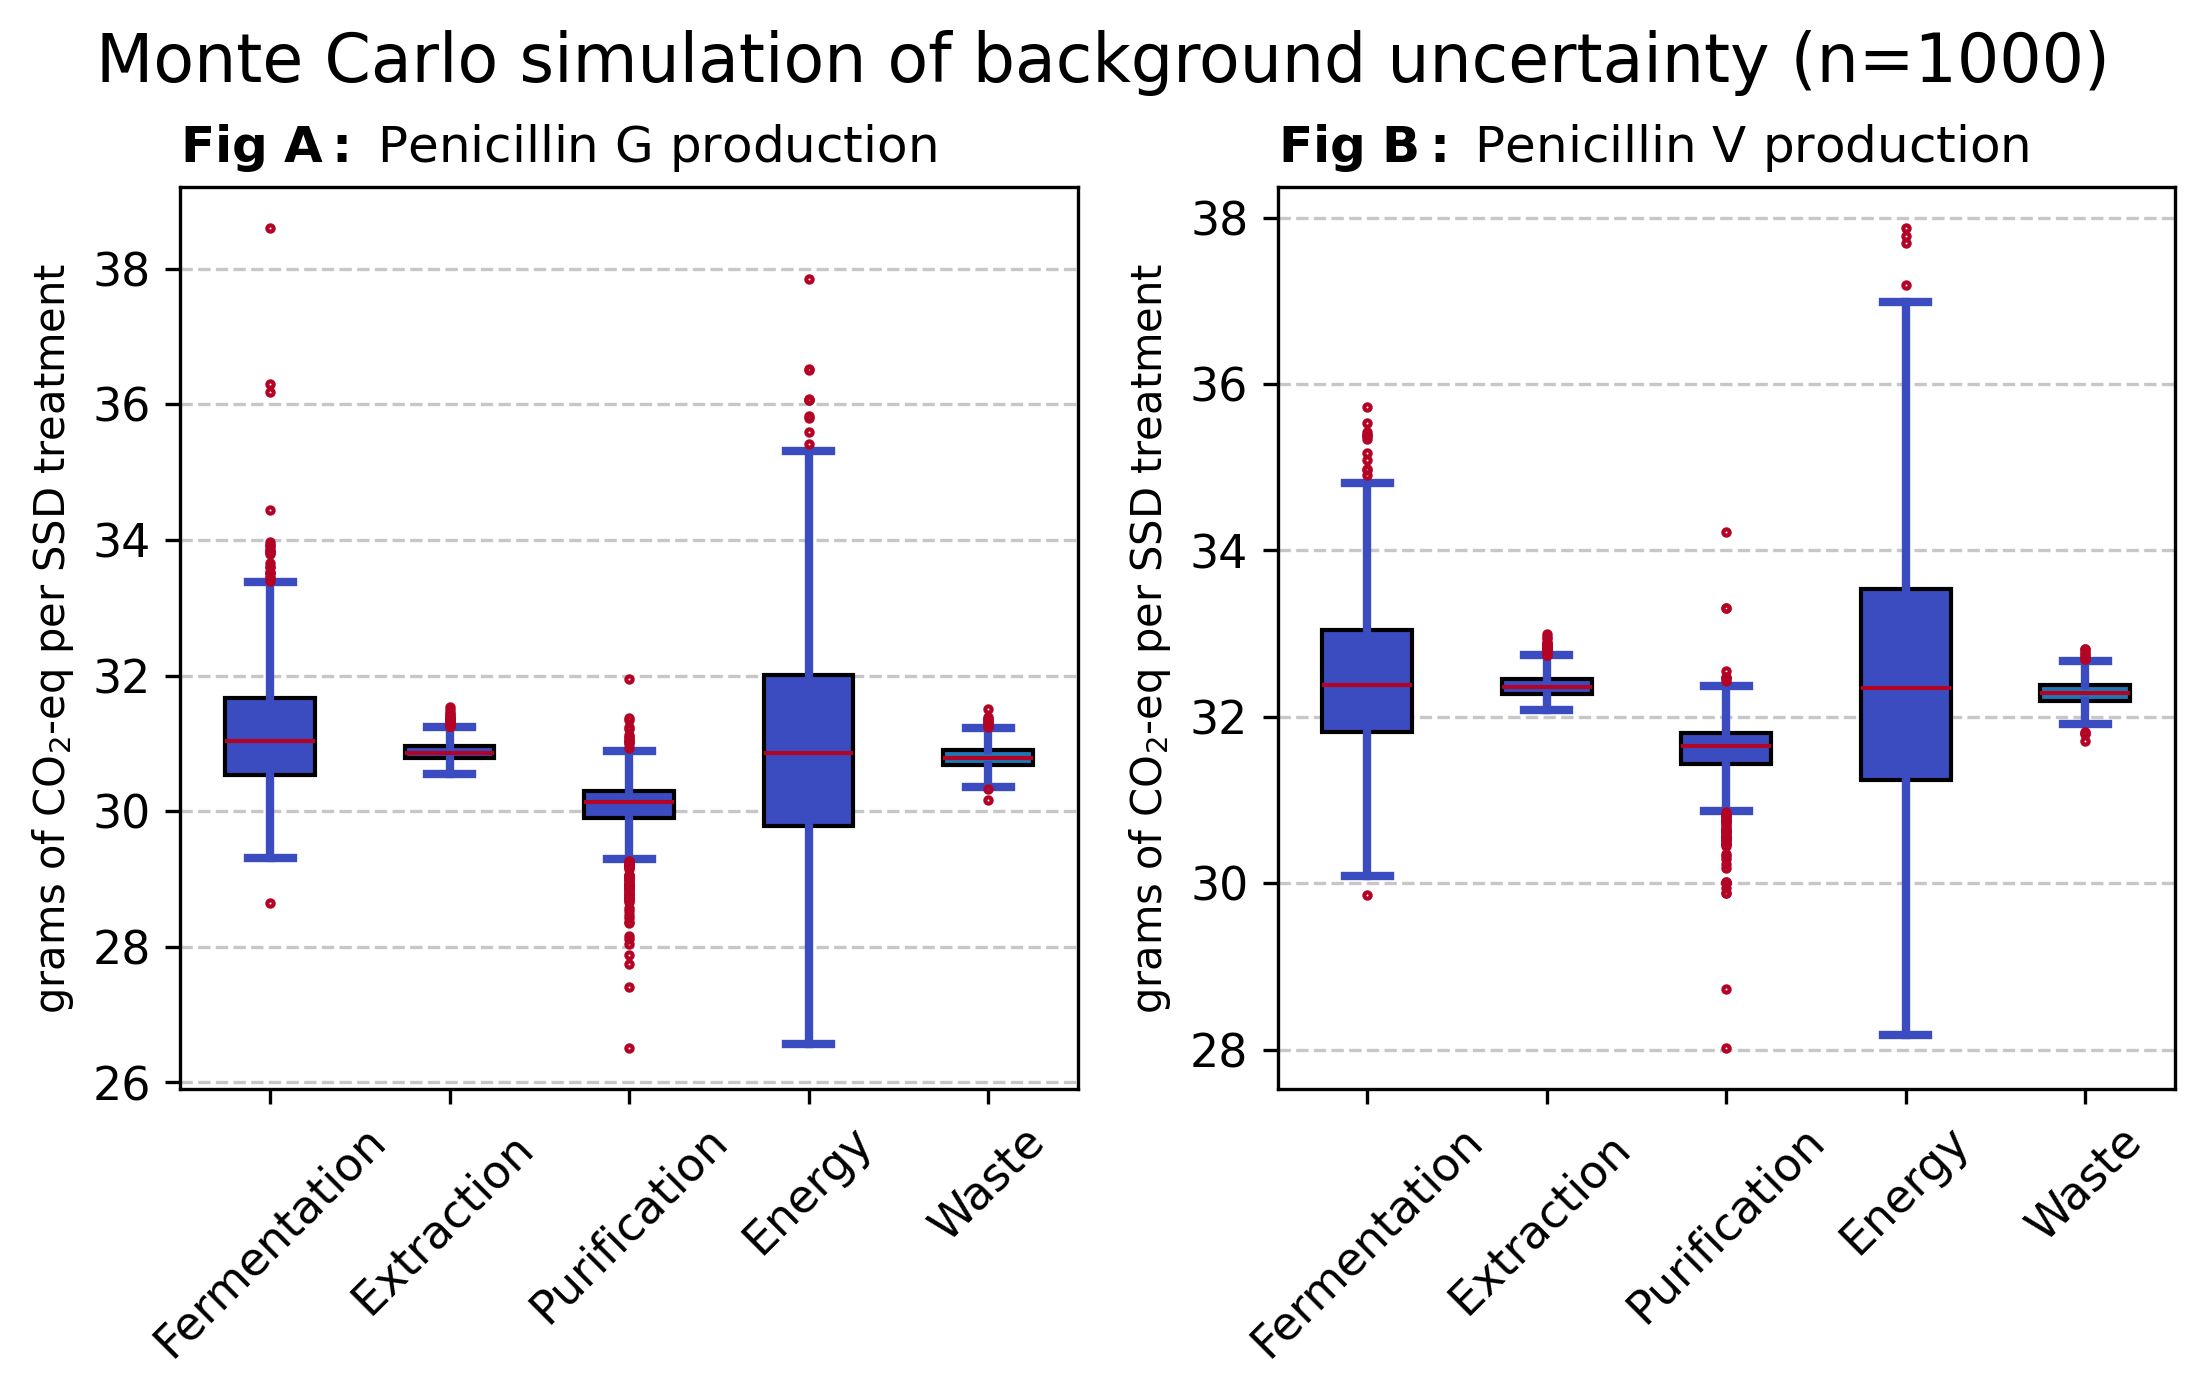

Oral saves 6.0%
Combined saves 44.0%


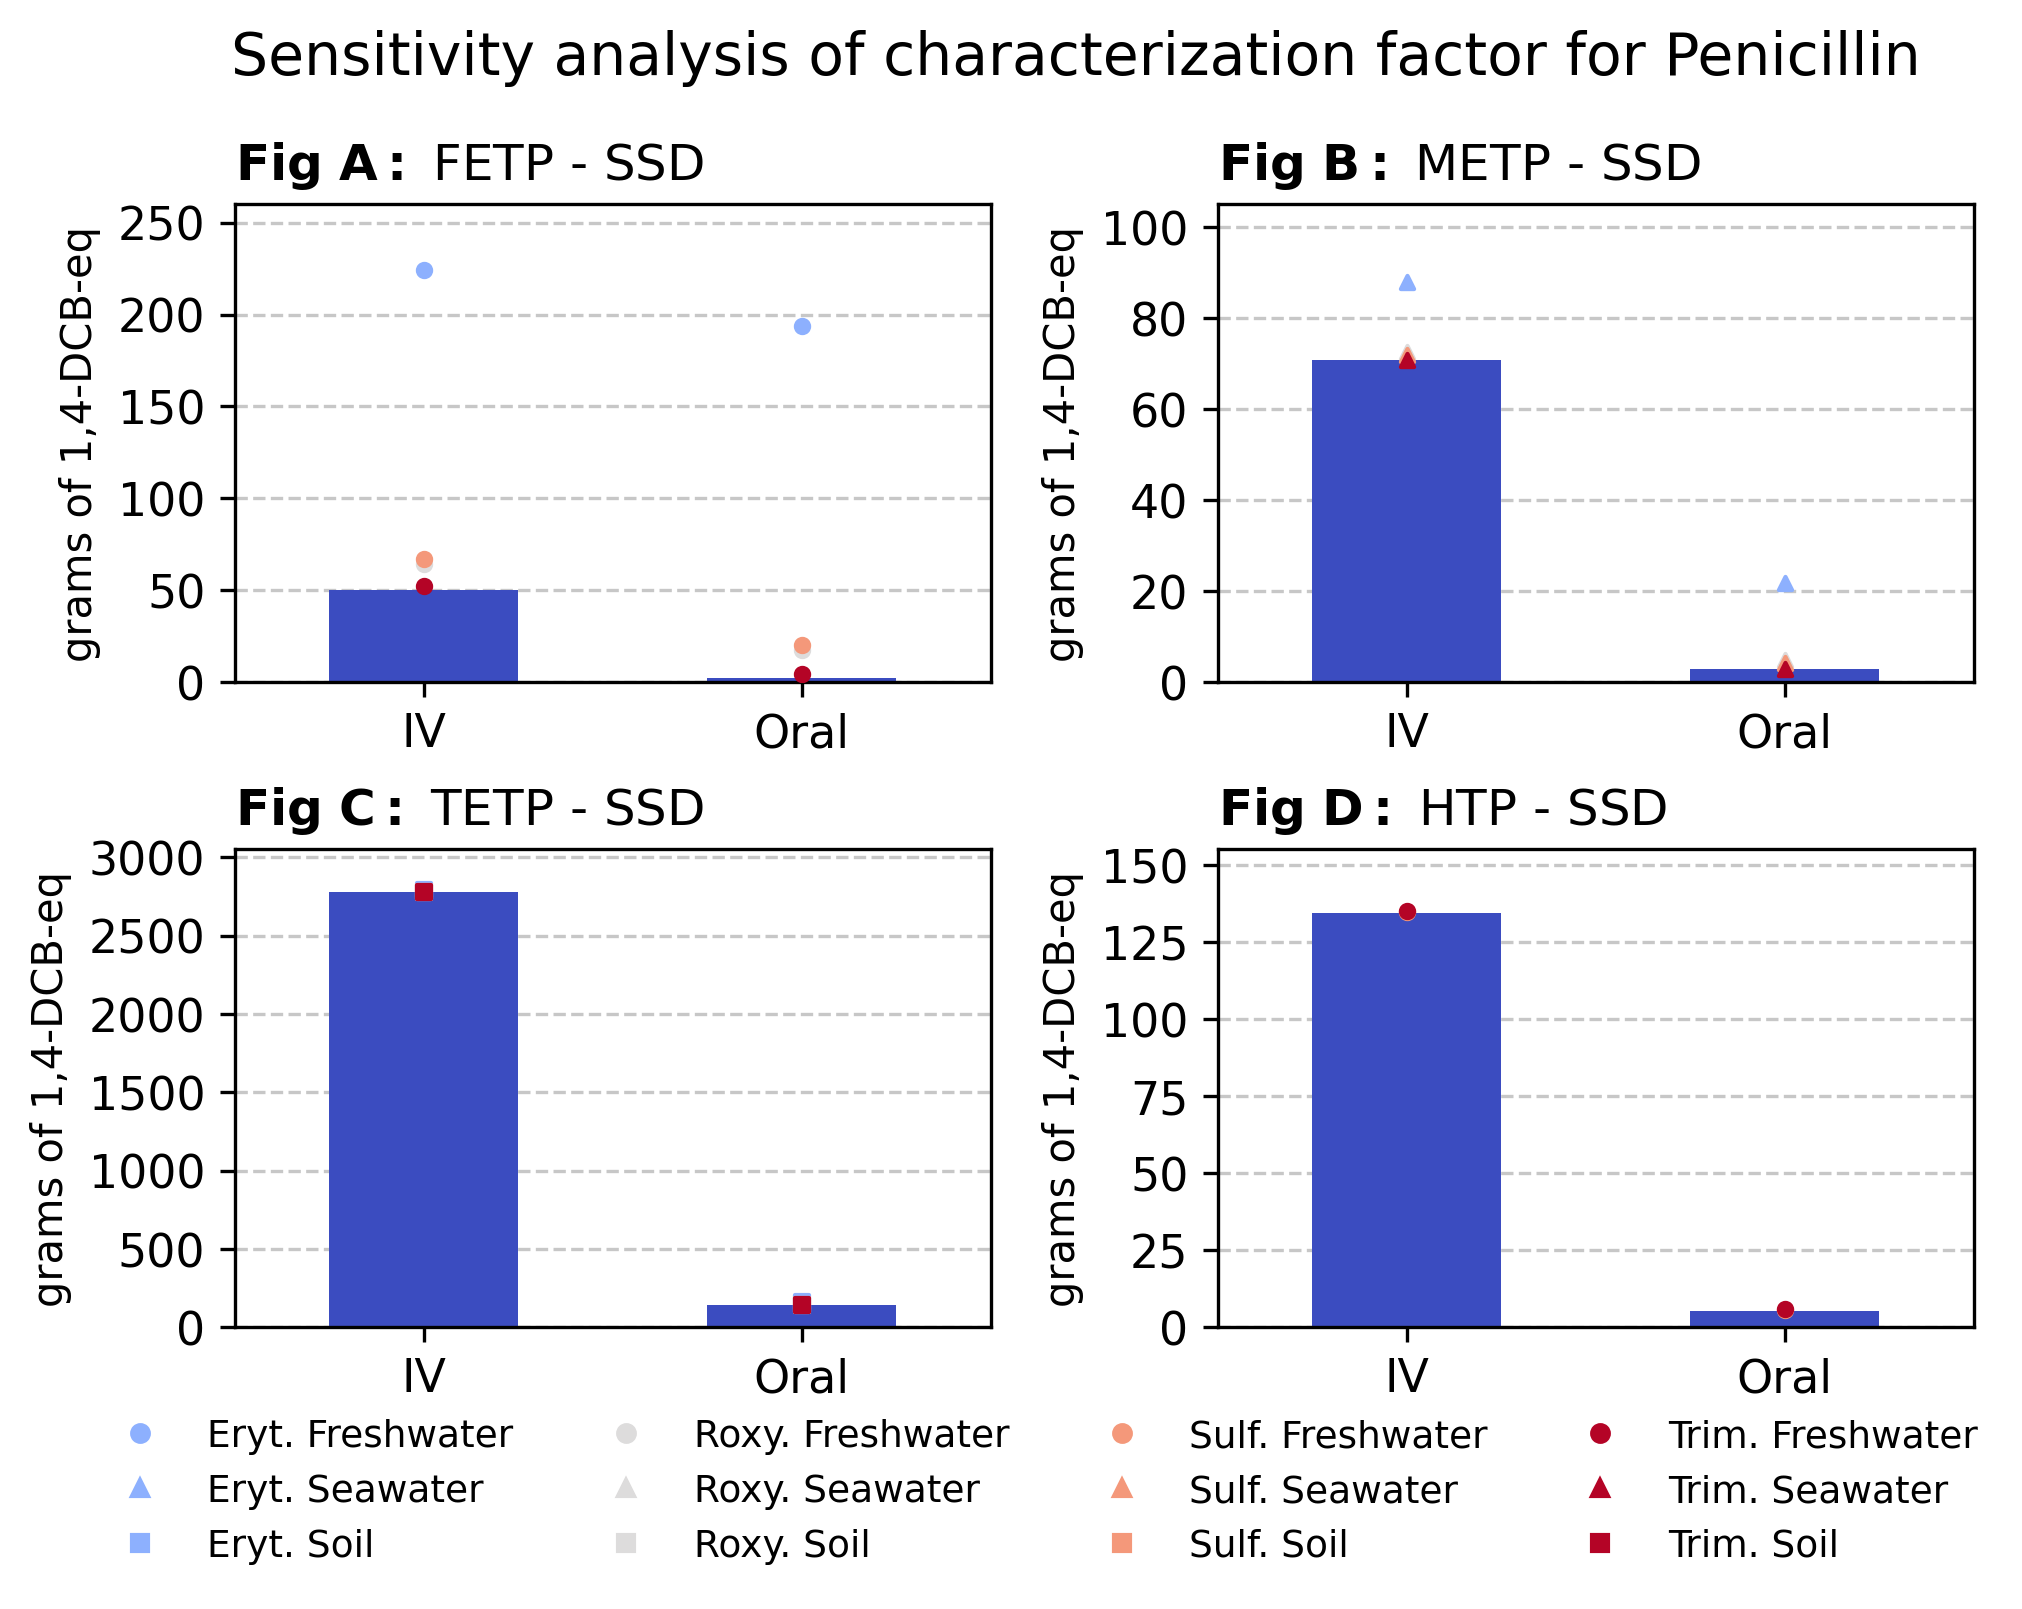

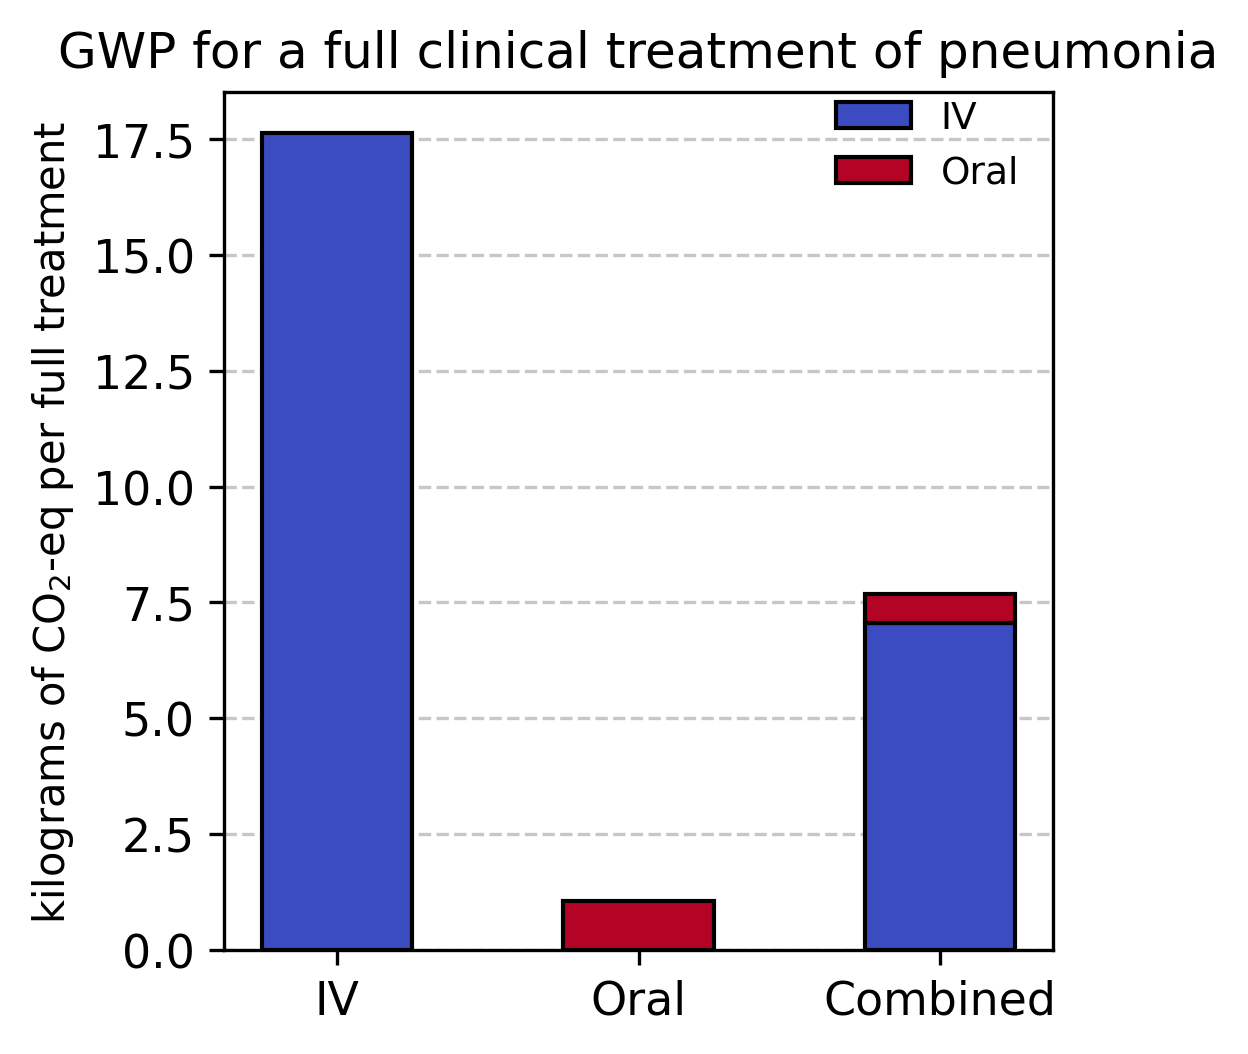

In [4]:
reload_lib([m, rfig, stc, mce, mte, pcs, st])

calc = False
reload = False



rfig.create_results_figures(calc=calc, reload=reload) # Calculating the results and creating the figures
st.perform_sens_uncert_analysis(samples=1000, calc=calc)
# st.clinical_treatment_plot()
# if calc:
#     init = m.main()
#     dct = init.create_LCI_tables()


In [91]:
# init = m.main()
# dct = init.create_LCI_tables()